In [1]:
import os
from PIL import Image
import numpy as np

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3
DATASET_PATH = "PlantVillage"



In [3]:
#manually assigning the classses
class_names=['healthy','early_blight','late_blight']

In [4]:
#label Mapping
label_map = {
    'healthy': 0,
    'early_blight': 1,
    'late_blight': 2
}

In [5]:
#storage
images = []
labels =[]

In [6]:
#loop through each class folder
for class_name in class_names:
    class_folder = os.path.join(DATASET_PATH, class_name)
    label = label_map[class_name]

    for file_name in os.listdir(class_folder):
        file_path = os.path.join(class_folder, file_name)

        try:
            # Open, resize, convert to RGB
            img = Image.open(file_path).convert('RGB')
            img = img.resize((IMAGE_SIZE, IMAGE_SIZE))

            # Convert to array and normalize
            img_array = np.asarray(img, dtype=np.float32) / 255.0

            # Store image and label
            images.append(img_array)
            labels.append(label)

        except Exception as e:
            print(f"Skipping image {file_path}: {e}")

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

print("Class Names:", class_names)
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

Class Names: ['healthy', 'early_blight', 'late_blight']
Images shape: (2152, 256, 256, 3)
Labels shape: (2152,)


In [7]:
BATCH_SIZE = 32
# Create empty lists to store batches
image_batches = []
label_batches  = []

total_images =len(images)# Get total number of images
total_images

2152

In [8]:
# shuffling the images indices
indices = np.arange(total_images)
np.random.shuffle(indices)

# Apply shuffled indices to both images and labels
images = images[indices]
labels = labels[indices]

In [9]:
# Loop through all images and split them into batches
for i in range(0, total_images, BATCH_SIZE):
    # Get a batch of images and labels
    image_batch = images[i:i + BATCH_SIZE]
    label_batch = labels[i:i + BATCH_SIZE]

    # Add batch to the list
    image_batches.append(image_batch)
    label_batches.append(label_batch)

# Total number of batches
total_batches = len(image_batches)

print("Total batches created:", total_batches)
print("First batch shape:", image_batches[0].shape)
print("First batch labels:", label_batches[0])

Total batches created: 68
First batch shape: (32, 256, 256, 3)
First batch labels: [0 1 0 2 2 2 1 0 2 1 2 1 1 1 2 2 0 2 2 2 1 2 2 1 2 2 2 1 1 2 2 1]


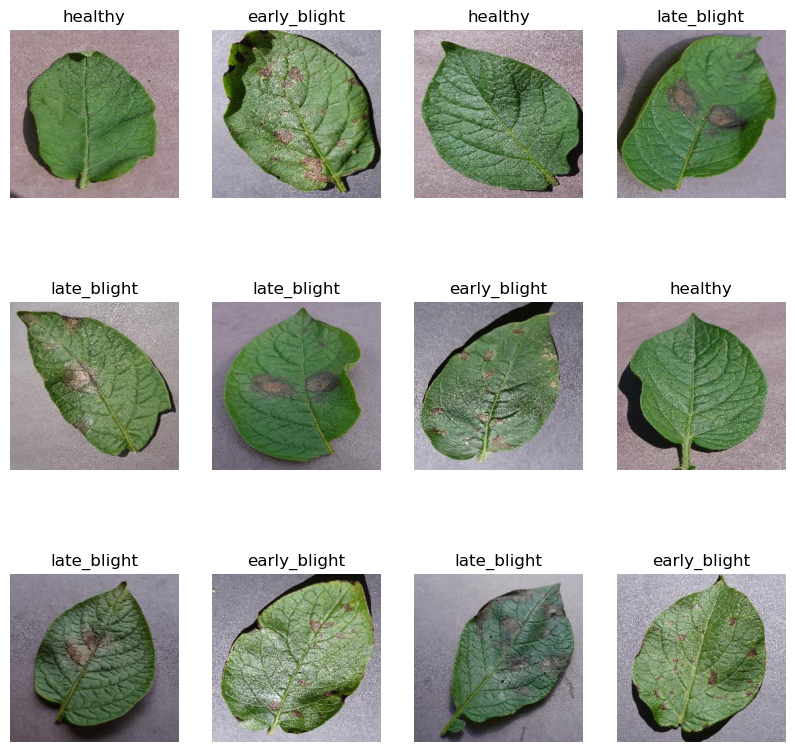

In [10]:
import matplotlib.pyplot as plt

# Get the first batch (already done before)
first_batch_images = image_batches[0]
first_batch_labels = label_batches[0]

# Show 12 images from the first batch
plt.figure(figsize=(10, 10))

for i in range(12):  # Display first 12 images
    ax = plt.subplot(3, 4, i + 1)  # (rows, columns, position)

    plt.imshow(first_batch_images[i])  # already a NumPy array
    plt.axis("off")  # Hide axis
    plt.title(class_names[first_batch_labels[i]])  # Show class label

plt.show()


In [11]:
# Total number of batches
total_batches = len(image_batches)  # Should be 68

# Calculate split sizes based on your logic
train_batches_count = int(0.8 * total_batches)  # 80% = 54
val_batches_count = int(0.1 * total_batches)    # 10% = 6
test_batches_count = total_batches - train_batches_count - val_batches_count  # Remaining = 8

# Train split
train_image_batches = image_batches[:train_batches_count]
train_label_batches = label_batches[:train_batches_count]

# Validation split (next 6)
val_image_batches = image_batches[train_batches_count:train_batches_count + val_batches_count]
val_label_batches = label_batches[train_batches_count:train_batches_count + val_batches_count]

# Test split (remaining)
test_image_batches = image_batches[train_batches_count + val_batches_count:]
test_label_batches = label_batches[train_batches_count + val_batches_count:]

# Check results
print("Total batches:", total_batches)
print("Train batches:", len(train_image_batches))
print("Validation batches:", len(val_image_batches))
print("Test batches:", len(test_image_batches))

Total batches: 68
Train batches: 54
Validation batches: 6
Test batches: 8


In [12]:
print(image_batches[7][1])#7 BATCH's 1 IMAGE

[[[0.5411765  0.5137255  0.5411765 ]
  [0.63529414 0.60784316 0.63529414]
  [0.52156866 0.49411765 0.52156866]
  ...
  [0.6784314  0.65882355 0.68235296]
  [0.7254902  0.7058824  0.7294118 ]
  [0.7254902  0.7058824  0.7294118 ]]

 [[0.5882353  0.56078434 0.5882353 ]
  [0.5058824  0.47843137 0.5058824 ]
  [0.6784314  0.6509804  0.6784314 ]
  ...
  [0.8        0.78039217 0.8039216 ]
  [0.7607843  0.7411765  0.7647059 ]
  [0.7529412  0.73333335 0.75686276]]

 [[0.69411767 0.6666667  0.69411767]
  [0.6313726  0.6039216  0.6313726 ]
  [0.6784314  0.6509804  0.6784314 ]
  ...
  [0.8156863  0.79607844 0.81960785]
  [0.69803923 0.6784314  0.7019608 ]
  [0.6666667  0.64705884 0.67058825]]

 ...

 [[0.59607846 0.5764706  0.6039216 ]
  [0.5921569  0.57254905 0.6       ]
  [0.6392157  0.61960787 0.64705884]
  ...
  [0.7058824  0.69411767 0.7372549 ]
  [0.7254902  0.7137255  0.75686276]
  [0.70980394 0.69803923 0.7411765 ]]

 [[0.6        0.5803922  0.60784316]
  [0.7607843  0.7411765  0.76862746]


In [13]:
def augment_image(image):
    augmented_image = image.copy()

    # Random Horizontal Flip
    if random.random() > 0.5:
        augmented_image = cv2.flip(augmented_image, 1)

    # Random Vertical Flip
    if random.random() > 0.5:
        augmented_image = cv2.flip(augmented_image, 0)

    # ✅ Random Rotation (now conditional!)
    if random.random() > 0.5:
        angle = random.uniform(-20, 20)
        height, width = augmented_image.shape[:2]
        center = (width // 2, height // 2)

        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
        augmented_image = cv2.warpAffine(augmented_image, rotation_matrix, (width, height))

    return augmented_image


In [14]:
def maybe_augment_batch(batch_images, augment_prob=0.5):
    augmented_batch = []
    for img in batch_images:
        if random.random() < augment_prob:
            img = augment_image(img)
        augmented_batch.append(img)
    return np.array(augmented_batch)

In [15]:
import random
import cv2
combined = list(zip(train_image_batches, train_label_batches))
np.random.shuffle(combined)
train_image_batches, train_label_batches = zip(*combined)

for batch_x, batch_y in zip(train_image_batches, train_label_batches):
    batch_x = maybe_augment_batch(batch_x, augment_prob=0.5)
    # Placeholder: Train your model here on (batch_x, batch_y)
    pass

In [16]:
train_image_batches = list(train_image_batches)
train_label_batches = list(train_label_batches)

In [17]:
for idx in range(len(train_image_batches)):
    train_image_batches[idx] = maybe_augment_batch(train_image_batches[idx], augment_prob=0.5)

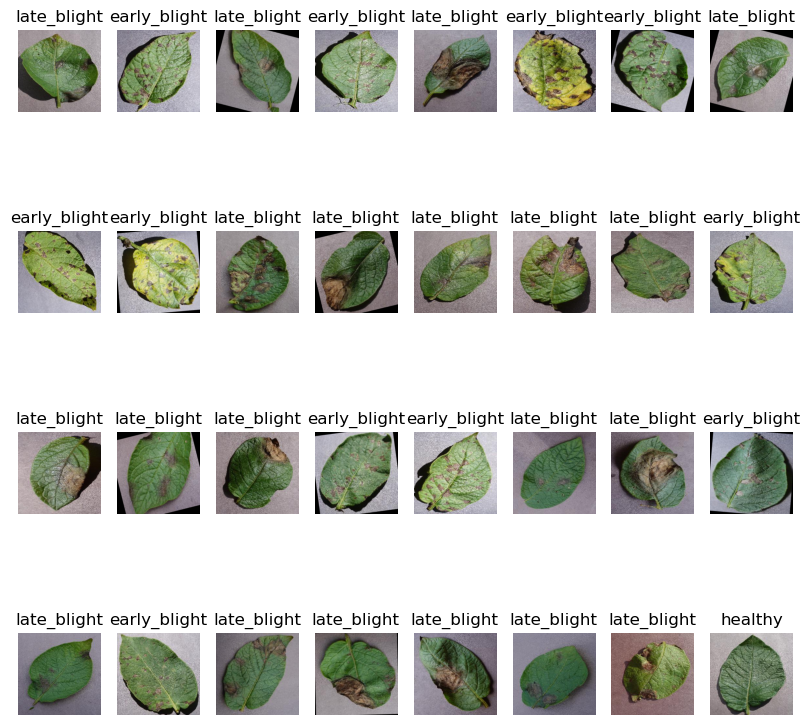

In [18]:
# Get the first batch (already done before)
first_batch_images = train_image_batches[0]
first_batch_labels =train_label_batches[0]

# Show 12 images from the first batch
plt.figure(figsize=(10, 10))

for i in range(32):  # Display first 12 images
    ax = plt.subplot(4, 8, i + 1)  # (rows, columns, position)

    plt.imshow(first_batch_images[i])  # already a NumPy array
    plt.axis("off")  # Hide axis
    plt.title(class_names[first_batch_labels[i]])  # Show class label

plt.show()

In [19]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
print(np.ndim(input_shape))

1


In [20]:
# Convert batched list to full arrays
X_train = np.concatenate(train_image_batches, axis=0)
y_train = np.concatenate(train_label_batches, axis=0)

X_val = np.concatenate(val_image_batches, axis=0)
y_val = np.concatenate(val_label_batches, axis=0)

X_test = np.concatenate(test_image_batches, axis=0)
y_test = np.concatenate(test_label_batches, axis=0)


In [21]:
X_train.shape


(1728, 256, 256, 3)

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models

n_classes = 3
model = models.Sequential([
    layers.Input(shape=(256, 256, 3)),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
    
)

In [25]:
EPOCHS = 15
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (1728, 256, 256, 3)
y_train shape: (1728,)
X_val shape: (192, 256, 256, 3)
y_val shape: (192,)


In [26]:
history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.4995 - loss: 0.9358 - val_accuracy: 0.4635 - val_loss: 0.8903
Epoch 2/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.6083 - loss: 0.8206 - val_accuracy: 0.8490 - val_loss: 0.4493
Epoch 3/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.7653 - loss: 0.4982 - val_accuracy: 0.9010 - val_loss: 0.2877
Epoch 4/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.8713 - loss: 0.3106 - val_accuracy: 0.8854 - val_loss: 0.3407
Epoch 5/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.8766 - loss: 0.2901 - val_accuracy: 0.9271 - val_loss: 0.2328
Epoch 6/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.9141 - loss: 0.1950 - val_accuracy: 0.9531 - val_loss: 0.1817
Epoch 7/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step - accuracy: 0.9282 - loss: 0.1603 - val_accuracy: 0.9115 - val_loss: 0.2838
Epoch 8/15
54/54 ━━━━━━━━━━━━━━━━━━━━ 225s 4s/step - accuracy: 0.9370 - loss: 0.1558 - val_accuracy: 0.9167 - v

In [27]:
score = model.evaluate(X_test, y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 555ms/step - accuracy: 0.9644 - loss: 0.0736
Test loss: 0.08128011971712112
Test accuracy: 0.9655172228813171


In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss  = history.history['val_loss']

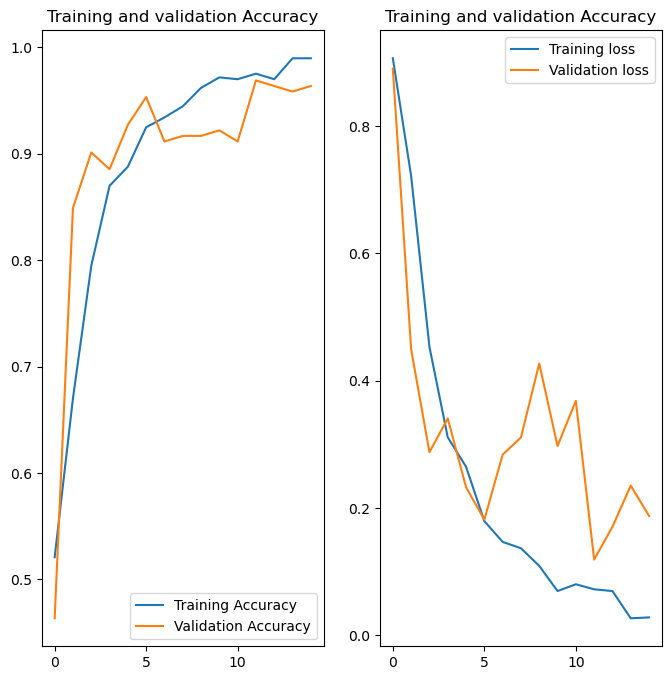

In [29]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label= 'Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label= 'Training loss')
plt.plot(range(EPOCHS),val_loss,label='Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation Accuracy')
plt.show()

Image to predict:


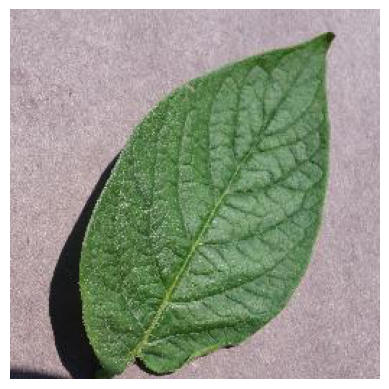

Actual Label: healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
Predicted Label: healthy


In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Select first image and label from test set
first_image = X_test[6]
first_label = y_test[6]

# Display the image
print("Image to predict:")
plt.imshow(first_image)
plt.axis("off")
plt.show()

# Actual label
print("Actual Label:", class_names[first_label])

# Expand dimensions to simulate a batch (1, 256, 256, 3)
image_for_model = np.expand_dims(first_image, axis=0)

# Predict
prediction = model.predict(image_for_model)
predicted_label = np.argmax(prediction[0])

# Output prediction
print("Predicted Label:", class_names[predicted_label])


In [31]:
def predict(model, img):
    # Expand dimensions to simulate a batch of 1
    img_array = np.expand_dims(img, axis=0)
    
    # Predict
    predictions = model.predict(img_array, verbose=0)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)
    
    return predicted_class, confidence

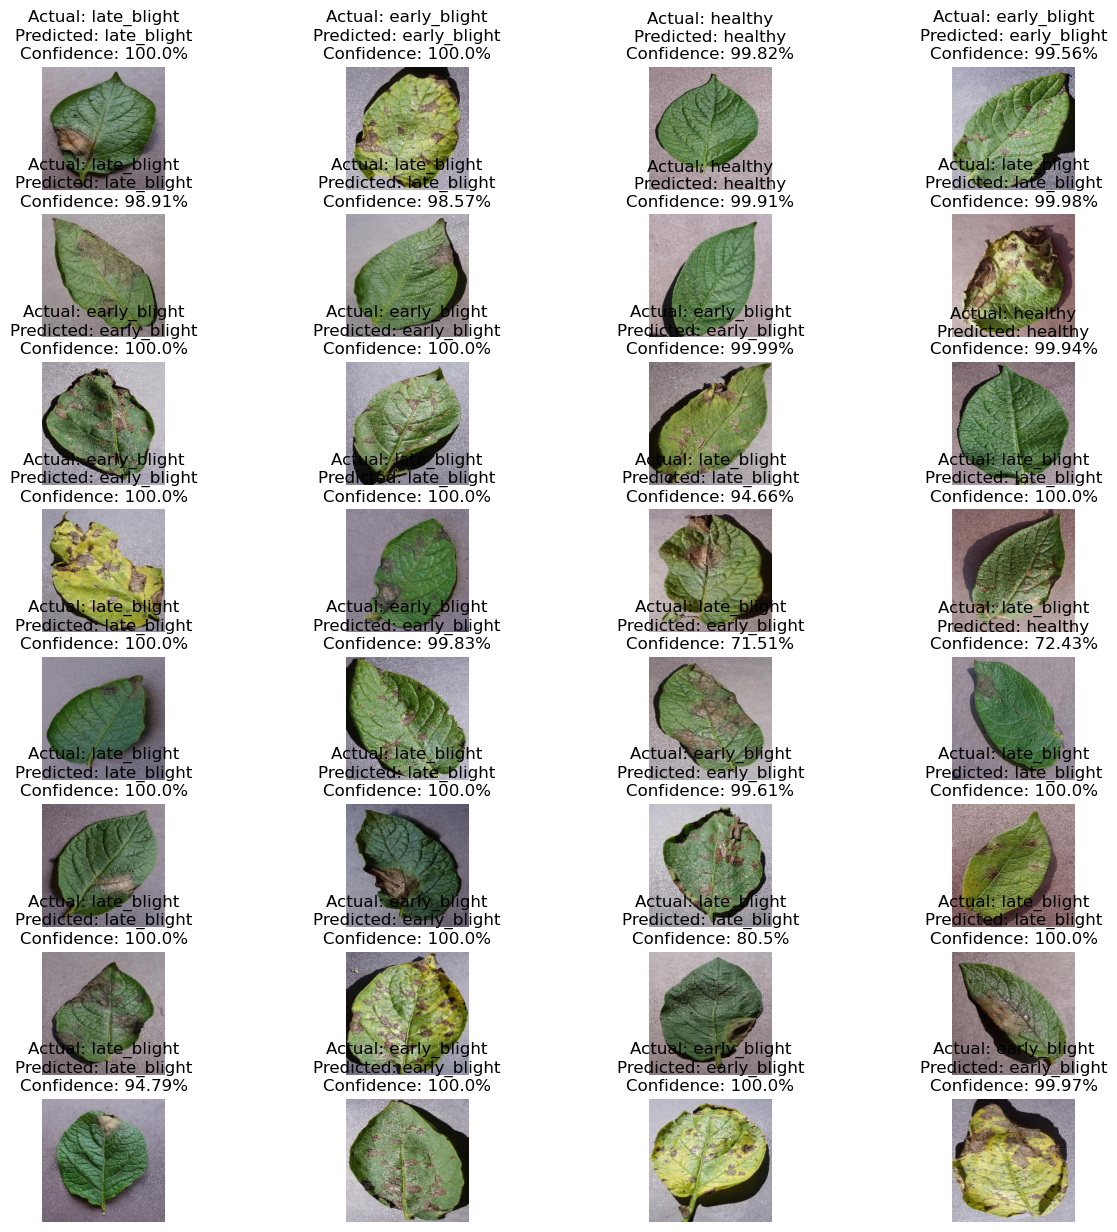

In [32]:
plt.figure(figsize=(15, 15))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_test[i])
    predicted_class, confidence = predict(model, X_test[i])
    actual_class = class_names[y_test[i]]
    
    plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%")
    plt.axis("off")
plt.show()

In [34]:
# Save in SavedModel format (for Docker TensorFlow Serving)
model.export("../model/2")



INFO:tensorflow:Assets written to: ../model/2\assets


INFO:tensorflow:Assets written to: ../model/2\assets


Saved artifact at '../model/2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2008523479120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2008523480272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2008523478928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2008523478544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2008523478352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2008523479696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2008523480656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2008523479504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2008523481616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2008523482576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2008523479888: TensorSpec(shape=(), dtyp